<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

##  Analysis of modelling techniques and Inisghts are listed at the end (Please scroll to end)

## Objectives
The main objective of the analysis specifies whether your model will be focused on prediction or interpretation.
* Trying to understand the factors that influence the sale price of mobile phones.

* Specifically, which factors drive mobile phone prices up? (Interpretation power)
* how accurately can you predict the sale price based on the mobile phone's features? (Prediction power)




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [2]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
!pip install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y


### Brief description of the data set you chose and a summary of its attributes.

- Phone Name is the name of the phone that is extracted.
- Rating is what it gets out of 5 stars.
- The number of Ratings is the Total number of people those rates this product.
- Ram size
- Rom is the Storage that the product has.
- Front and Rare Camera in the Mega Pixels.
- Battery size and processor of different types.
- Lastly, the price of the phone is in Indian Rupees.

All this data is gathered from the Flipkart Indian Online shopping website.Source: [Data](https://www.kaggle.com/datasets/howisusmanali/mobile-prices-2023?resource=download)

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import os 

# os.getcwd()

In [4]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline


from scipy.stats import boxcox
from scipy.stats.mstats import normaltest

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error



from sklearn.pipeline import Pipeline


#### Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [5]:
data = pd.read_csv("mobile_prices_2023.csv")
data.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [6]:
print(data.shape)

(1836, 11)


# 1. About the Data


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), object(10)
memory usage: 157.9+ KB


In [8]:
### renaming columns names: 

data.columns = ['Phone_Name', 'Rating', 'Number_of_Ratings','RAM',
 'ROM_Storage',
 'Back_Rare_Camera',
 'Front_Camera',
 'Battery',
 'Processor',
 'Price_INR',
 'Date_of_Scraping']


In [9]:
# data.isnull().sum()
# data = data.fillna("NaN")

In [10]:
### removing wrong values and changing datatypeS: 
data['Price_INR'] = data['Price_INR'].replace({'₹':''}, regex = True)
data['Price_INR'] = data['Price_INR'].replace({',':''}, regex = True)
data['Price_INR'] = data['Price_INR'].astype('int64')

In [11]:
data['Number_of_Ratings'] = data['Number_of_Ratings'].replace({',':''}, regex = True)
data['Number_of_Ratings'] =data['Number_of_Ratings'].astype('int64')

In [12]:
data['Date_of_Scraping'] = pd.to_datetime(data['Date_of_Scraping'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Phone_Name         1836 non-null   object        
 1   Rating             1836 non-null   float64       
 2   Number_of_Ratings  1836 non-null   int64         
 3   RAM                1836 non-null   object        
 4   ROM_Storage        1662 non-null   object        
 5   Back_Rare_Camera   1827 non-null   object        
 6   Front_Camera       1435 non-null   object        
 7   Battery            1826 non-null   object        
 8   Processor          1781 non-null   object        
 9   Price_INR          1836 non-null   int64         
 10  Date_of_Scraping   1836 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 157.9+ KB


In [14]:
# extracting phone brand:
data['Brand'] = data['Phone_Name'].str.split(" ").str[0].str.lower()

In [15]:
data['Brand'].unique()

array(['poco', 'realme', 'apple', 'samsung', 'oppo', 'google', 'vivo',
       'nothing', 'redmi', 'mi', 'xiaomi', '10a', '�9a', 'nokia',
       'motorola', 'a10e', 'a', 'moto', 'oneplus', 'huawei', 'nexus',
       'alcatel', 'lenovo', 'infinix'], dtype=object)

Cleaning Processor columns: 

In [16]:
data.loc[data.Brand == "apple", ['Processor']] = 'Apple(IOS)'  ##3 this changes the dataset

In [17]:
data['Brand'].unique()
new_data = data[(data['Brand'] == "apple")]
new_data.Processor.value_counts()

Apple(IOS)    144
Name: Processor, dtype: int64

In [18]:
data = data[(data['Brand'] != '10a') & (data['Brand'] != 'a')  & (data['Brand'] != '�9a') & (data['Brand'] != 'a10e') & 
            (data['Brand'] != 'nothing')]

In [19]:
# import pandas as pd
# pd.set_option('display.max_rows', None)
# data['Processor'].str.lower().unique()

# # .str.contains('Mediatek |Helio |Dimensity ', case=False, regex=True)

In [20]:
data['Processor'] = data['Processor'].str.lower()

In [22]:

def change_values(patt,proc_brand):
    for i in range(0,len(data)):
        data["Indexes"] = data['Processor'].str.contains(str(patt), case=False, regex=True)
        data.loc[data["Indexes"] == True, ['Processor']] = str(proc_brand)
#         len(data.loc[data.Indexes == True])


change_values('mediatek |helio |dimensity |mtk|media|mt6|g37 ', 'mediatek')
change_values('qualcomm|snapdragon|sdm|msm','qualcomm')
change_values('unisoc |sc|spreadtrum ', 'unisoc')
change_values('exynos|tensor ', 'samsung')
change_values('huawei |kirin |hisilicon ','huawei')
change_values('cortex','arm')
change_values('octa','qualcomm')

len(data.loc[data.Indexes == True])

0

In [23]:
data.Processor.value_counts()

mediatek                                                       600
qualcomm                                                       511
apple(ios)                                                     144
unisoc                                                         119
samsung                                                         76
                                                              ... 
1 year for device & six month for inbox accessories              1
domestic 1 year of device & 6 months for in-box accessories      1
1 year  manufacturer warranty                                    1
1 year manufacturer  warranty                                    1
brand warranty of 18 months available for mobile                 1
Name: Processor, Length: 74, dtype: int64

In [30]:
data.shape

(1757, 14)

In [31]:

data["Indexes1"] = ~data['Processor'].isin(['mediatek', 'qualcomm', 'unisoc', 'apple(ios)', 'samsung','huawei','arm'])

## check number of rows excluded
len(data.loc[data.Indexes1 == True]) ##uncomment this after to check each above line

##check data 
# data.loc[data.Indexes1 == True]


0

In [32]:
## delaing with rest of the [phone brand processors]:

data.loc[(data.Indexes1 == True) & (data.Brand == 'samsung'), ['Processor']] = 'samsung'
data.loc[(data.Indexes1 == True) & (data.Brand == 'realme'), ['Processor']] = 'mediatek'

data.loc[(data.Indexes1 == True) & (data.Brand == 'mi') |(data.Brand == 'xiaomi') | (data.Brand == 'nokia') |
         (data.Brand == 'motorola') | (data.Brand == 'oneplus') | (data.Brand == 'oppo')|(data.Brand == 'vivo')|
         (data.Brand == 'redmi')
         , ['Processor']] = 'qualcomm'

data.loc[(data.Indexes1 == True) & (data.Brand == 'alcatel'), ['Processor']] = 'unisoc'
data.loc[(data.Indexes1 == True) & (data.Brand == 'huawei'), ['Processor']] = 'huawei'


In [33]:
data.Processor.value_counts()

qualcomm      1034
mediatek       327
samsung        162
apple(ios)     134
unisoc          92
huawei           7
arm              1
Name: Processor, dtype: int64

- spreadtrum , sc6531e =  UNISOC 
- snapdragon, sdm710, msm8228 processor  = qualcomm 
- Huawei == hisilicon/ kirin 
- exynos, tensor g2 processor == samsung 
- cortex-a7 processor == ARM 

In [34]:
data.drop_duplicates(inplace =True)

In [35]:
data.shape

(1757, 14)

## Checkpoint data: 

In [36]:
data1 = data.copy()

1. Cleaning RAM columns

In [37]:
data1['RAM'] = data1['RAM'].replace({'ROM':'RAM',
                                     'NA MB RAM': "n/a",
                                     'NA RAM' : "n/a",
                                     'cm Display':"n/a",'3.81 cm (1.5 inch) Display': 'display', 
                                     'Expandable Upto 2 GB': "Expandable", 
                                     'Expandable Upto 16 GB':'Expandable'}, regex = True)

In [38]:
data1 = data1[(data1['RAM'] != 'n/a') 
          & (data1['RAM'] != '3.81 cm (1.5 inch) Display') 
          & (data1['RAM'] != 'Expandable')
          & (data1['RAM'] != 'NA RAM') 
          & (data1['RAM'] != 'NA MB RAM')]

# data1['RAM'].value_counts()

In [39]:
##spliting column RAM: 
data1[['RAM_GB', 'RAM_size', "Memory_type"]] = data1.RAM.str.split(" ", n = 3, expand = True)

##convert to float:
data1["RAM_GB"] = data1["RAM_GB"].astype('float64')

In [40]:
# Scale RAM size to GB: 
for x in data1.index: 
    if data1.RAM_size[x] == "MB": 
        data1.RAM_GB[x] = data1.RAM_GB[x]/1000
    elif data1.RAM_size[x] == "TB": 
        data1.RAM_GB[x] = data1.RAM_GB[x]*1000

data1["RAM_GB"] = round(data1["RAM_GB"],3)

In [41]:
data1 = data1.drop(["Memory_type", "RAM_size"], axis = 1)

In [42]:
## re-arrange columns:
data1 = data1[['Phone_Name', 'Brand', 'Rating', 'Number_of_Ratings', 'RAM', 'ROM_Storage', 'RAM_GB',
       'Back_Rare_Camera', 'Front_Camera', 'Battery', 'Processor', 'Price_INR',
       'Date_of_Scraping']]
data1.head()

,Phone_Name,Brand,Rating,Number_of_Ratings,RAM,ROM_Storage,RAM_GB,Back_Rare_Camera,Front_Camera,Battery,Processor,Price_INR,Date_of_Scraping
0,"POCO C50 (Royal Blue, 32 GB)",poco,4.2,33561,2 GB RAM,32 GB ROM,2.0,8MP Dual Camera,5MP Front Camera,5000 mAh,mediatek,5649,2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",poco,4.2,77128,4 GB RAM,64 GB ROM,4.0,50MP + 2MP,8MP Front Camera,5000 mAh,mediatek,11999,2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",poco,4.3,15175,4 GB RAM,64 GB ROM,4.0,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,mediatek,6999,2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",poco,4.2,22621,4 GB RAM,64 GB ROM,4.0,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,mediatek,7749,2023-06-17
4,"POCO C51 (Power Black, 64 GB)",poco,4.3,15175,4 GB RAM,64 GB ROM,4.0,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,mediatek,6999,2023-06-17


2. Cleaning ROM columns

In [43]:
# spliting column RAM: 
data1['ROM_Storage'] = data1['ROM_Storage'].replace({"NA KB ROM": "n/a","NA ROM" : "n/a", 
                                                   "Expandable Upto 32 GB":"Expandable", 
                                                   "Expandable Upto 16 GB":"Expandable",
                                                  "Expandable Upto 8 GB": "Expandable"}, regex = False)

data1 = data1[(data1['ROM_Storage'] != 'n/a') & (data1['ROM_Storage'] != 'Expandable')]
data1.isnull().sum()  ## we have 138 values missing.. drop those rows 


Phone_Name             0
Brand                  0
Rating                 0
Number_of_Ratings      0
RAM                    0
ROM_Storage          138
RAM_GB                 0
Back_Rare_Camera       0
Front_Camera         342
Battery                0
Processor              0
Price_INR              0
Date_of_Scraping       0
dtype: int64

In [44]:
data1.dropna(subset=['ROM_Storage'],inplace= True)

In [45]:
##spliting column RAM: 
data1[['ROM_GB', 'ROM_size', "Memory_type"]] = data1.ROM_Storage.str.split(" ", n = 3, expand = True)

##convert to float:
data1["ROM_GB"] = data1["ROM_GB"].astype('float64')


In [46]:
for i in data1.index: 
    if data1.ROM_size[i] == "MB": 
        data1.ROM_GB[i] = data1.ROM_GB[i]/1000
    elif data1.ROM_size[i] == "TB": 
        data1.ROM_GB[i] = data1.ROM_GB[i]*1000

data1["ROM_GB"] = round(data1["ROM_GB"],3)

data1.shape

(1583, 16)

In [47]:
data1.drop(["Memory_type", "ROM_size"], axis = 1, inplace= True)
data1.shape

(1583, 14)

In [48]:
data1.columns

Index(['Phone_Name', 'Brand', 'Rating', 'Number_of_Ratings', 'RAM',
       'ROM_Storage', 'RAM_GB', 'Back_Rare_Camera', 'Front_Camera', 'Battery',
       'Processor', 'Price_INR', 'Date_of_Scraping', 'ROM_GB'],
      dtype='object')

In [49]:
data1 = data1[['Phone_Name','Brand','Rating', 'Number_of_Ratings', 'RAM', 'RAM_GB','ROM_Storage','ROM_GB',
        'Back_Rare_Camera', 'Front_Camera', 'Battery', 'Processor',
       'Price_INR', 'Date_of_Scraping']]
data1.head()

,Phone_Name,Brand,Rating,Number_of_Ratings,RAM,RAM_GB,ROM_Storage,ROM_GB,Back_Rare_Camera,Front_Camera,Battery,Processor,Price_INR,Date_of_Scraping
0,"POCO C50 (Royal Blue, 32 GB)",poco,4.2,33561,2 GB RAM,2.0,32 GB ROM,32.0,8MP Dual Camera,5MP Front Camera,5000 mAh,mediatek,5649,2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",poco,4.2,77128,4 GB RAM,4.0,64 GB ROM,64.0,50MP + 2MP,8MP Front Camera,5000 mAh,mediatek,11999,2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",poco,4.3,15175,4 GB RAM,4.0,64 GB ROM,64.0,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,mediatek,6999,2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",poco,4.2,22621,4 GB RAM,4.0,64 GB ROM,64.0,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,mediatek,7749,2023-06-17
4,"POCO C51 (Power Black, 64 GB)",poco,4.3,15175,4 GB RAM,4.0,64 GB ROM,64.0,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,mediatek,6999,2023-06-17


3. Cleaning battery 

In [50]:
data1['Battery'].unique()

array(['5000 mAh', '4500 mAh', '4000 mAh', '5160 mAh', '6000 mAh',
       '5065 mAh', '4200 mAh', '4300 mAh', '4230 mAh', '800 mAh',
       '3300 mAh', '3900 mAh', '1 mAh', '0 mAh', '7000 mAh', '3700 mAh',
       '4700 mAh', '3000 mAh', '1500 mAh', '1000 mAh', '2000 mAh',
       '2600 mAh', '2050 mAh', '4800 mAh', '4015 mAh', '4025 mAh',
       '3400 mAh', '3765 mAh', '4350 mAh', '4310 mAh', '3200 mAh',
       '4020 mAh', '4410 mAh', '4270 mAh', '4926 mAh', '2915 mAh',
       '4600 mAh', '4030 mAh', '4050 mAh', '4810 mAh', '4830 mAh',
       '4870 mAh', '4450 mAh', '3315 mAh', '3225 mAh', '3260 mAh',
       '4250 mAh', '4520 mAh', '3080 mAh', '3120 mAh', '5018 mAh',
       '4100 mAh', '5020 mAh', '4850 mAh', '3030 mAh', '3010 mAh',
       '4820 mAh', '4780 mAh', '5300 mAh', '1020 mAh', 'MediaTek mAh',
       'Brand mAh', '1200 mAh', '1450 mAh', '1150 mAh', '5050 mAh',
       '3060 mAh', 'Unisoc mAh', '4950 mAh', '12 mAh', '2150 mAh',
       '950 mAh', '1430 mAh', '1110 mAh', '4400 mAh'

In [51]:
data1 = data1[(data1['Battery'] != "MediaTek mAh") & 
                 (data1['Battery'] != "Brand mAh") & 
                 (data1['Battery'] != "Unisoc mAh") &
                (data1['Battery'] != "0 mAh")]

data1[['Battery_mAh', 'Battery_size']] = data1.Battery.str.split(" ", n = 2, expand = True)
data1["Battery_mAh"] = data1["Battery_mAh"].astype('int64')
data1.shape

(1571, 16)

In [52]:
data1.drop(["Battery_size"], axis = 1, inplace= True)
print(data1.shape)
data1.columns

(1571, 15)


Index(['Phone_Name', 'Brand', 'Rating', 'Number_of_Ratings', 'RAM', 'RAM_GB',
       'ROM_Storage', 'ROM_GB', 'Back_Rare_Camera', 'Front_Camera', 'Battery',
       'Processor', 'Price_INR', 'Date_of_Scraping', 'Battery_mAh'],
      dtype='object')

In [53]:
data1 = data1[['Phone_Name', 'Brand','Rating', 'Number_of_Ratings', 'RAM', 'RAM_GB',
       'ROM_Storage', 'ROM_GB', 'Back_Rare_Camera', 'Front_Camera', 'Battery','Battery_mAh',
       'Processor', 'Price_INR', 'Date_of_Scraping']]
data1.head()

,Phone_Name,Brand,Rating,Number_of_Ratings,RAM,RAM_GB,ROM_Storage,ROM_GB,Back_Rare_Camera,Front_Camera,Battery,Battery_mAh,Processor,Price_INR,Date_of_Scraping
0,"POCO C50 (Royal Blue, 32 GB)",poco,4.2,33561,2 GB RAM,2.0,32 GB ROM,32.0,8MP Dual Camera,5MP Front Camera,5000 mAh,5000,mediatek,5649,2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",poco,4.2,77128,4 GB RAM,4.0,64 GB ROM,64.0,50MP + 2MP,8MP Front Camera,5000 mAh,5000,mediatek,11999,2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",poco,4.3,15175,4 GB RAM,4.0,64 GB ROM,64.0,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,5000,mediatek,6999,2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",poco,4.2,22621,4 GB RAM,4.0,64 GB ROM,64.0,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,5000,mediatek,7749,2023-06-17
4,"POCO C51 (Power Black, 64 GB)",poco,4.3,15175,4 GB RAM,4.0,64 GB ROM,64.0,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,5000,mediatek,6999,2023-06-17


4. Cleaning front camera attribute: 

In [54]:
data1.isnull().sum()  ## we have Front_Camera with 326 rows null
data1['Front_Camera'] = data1['Front_Camera'].fillna(method = 'bfill', axis = 0)
data1.isnull().sum()

Phone_Name           0
Brand                0
Rating               0
Number_of_Ratings    0
RAM                  0
RAM_GB               0
ROM_Storage          0
ROM_GB               0
Back_Rare_Camera     0
Front_Camera         0
Battery              0
Battery_mAh          0
Processor            0
Price_INR            0
Date_of_Scraping     0
dtype: int64

In [55]:
data1.Front_Camera.value_counts()
limit  = data1.Front_Camera.value_counts()
data1 = data1[data1["Front_Camera"].isin(limit.index[limit > 1])]

print(data1.shape)
data1.Front_Camera.value_counts()

(1568, 15)


16MP Front Camera               387
8MP Front Camera                354
5MP Front Camera                298
32MP Front Camera               108
13MP Front Camera               102
20MP Front Camera                75
32MP + 8MP Dual Front Camera     44
2MP Front Camera                 36
16MP Dual Front Camera           19
12MP Front Camera                18
50MP Front Camera                16
20MP + 2MP Dual Front Camera     15
10MP Front Camera                12
44MP Front Camera                12
10.8MP Front Camera               9
50MP + 8MP Dual Front Camera      9
25MP Front Camera                 8
60MP Front Camera                 6
0.3MP Front Camera                6
44MP + 2MP Dual Front Camera      5
16MP + 2MP Dual Front Camera      4
32MP + 2MP Dual Front Camera      4
4MP Front Camera                  4
8MP + 8MP Dual Front Camera       3
16MP + 8MP Dual Front Camera      3
24MP Front Camera                 3
8MP + 2MP Dual Front Camera       3
60 MP with OIS              

In [56]:
data1.columns

Index(['Phone_Name', 'Brand', 'Rating', 'Number_of_Ratings', 'RAM', 'RAM_GB',
       'ROM_Storage', 'ROM_GB', 'Back_Rare_Camera', 'Front_Camera', 'Battery',
       'Battery_mAh', 'Processor', 'Price_INR', 'Date_of_Scraping'],
      dtype='object')

In [57]:
data1.Back_Rare_Camera.value_counts()
# data1.Back_Rare_Camera.unique()

50MP Rear Camera                       95
13MP Rear Camera                       89
13MP + 2MP                             79
64MP + 8MP + 2MP                       76
50MP + 2MP + 2MP                       76
                                       ..
16MP + 2MP + 2MP                        1
25MP + 5MP + 8MP                        1
48MP + 16MP                             1
48MP +8MP+16MP                          1
16MP + 5MP + 2MP + Low Light Sensor     1
Name: Back_Rare_Camera, Length: 161, dtype: int64

In [58]:
data1.Back_Rare_Camera.value_counts()
limit  = data1.Back_Rare_Camera.value_counts()
data1 = data1[data1["Back_Rare_Camera"].isin(limit.index[limit > 5])]
data1.shape

(1287, 15)

In [59]:
data1 = data1[(data1['Back_Rare_Camera'] != "800 mAh Battery")]
data1.shape      

(1280, 15)

In [60]:
data1['Back_Rare_Camera'] = data1['Back_Rare_Camera'].replace({
            '50 MP + 2 MP Depth Lens + 2 MP Macro Lens':'50MP + 2MP Depth Sensor + 2MP Macro Sensor'}, regex = False)


In [61]:
data1.Back_Rare_Camera.unique()


array(['50MP + 2MP', '50MP Dual Rear Camera',
       '50MP + 2MP Depth Sensor + 2MP Macro Sensor', '64MP + 8MP + 2MP',
       '48MP + 8MP + 2MP', '50MP + 8MP', '108MP + 8MP + 2MP',
       '48MP + 2MP + 2MP', '64MP (OIS) + 8MP + 2MP', '13MP + 2MP + 2MP',
       '64MP + 8MP + 2MP + 2MP', '12MP + 5MP', '48MP + 8MP + 5MP + 2MP',
       '48MP + 8MP + 2MP + 2MP', '64MP + 2MP', '50MP + 0.3MP',
       '8MP Rear Camera', '108MP + 2MP', '50MP + 2MP + 2MP',
       '64MP Rear Camera', '50MP + 8MP + 2MP', '50MP Rear Camera',
       '48MP Rear Camera', '13MP + 2MP', '50MP + 5MP + 2MP',
       '108MP Rear Camera', '12MP Rear Camera', '12MP + 12MP',
       '48MP + 8MP + 5MP', '50MP + 10MP + 12MP', '13MP Rear Camera',
       '48MP + 5MP + 2MP + 2MP', '64MP + 12MP + 5MP + 5MP',
       '5MP Rear Camera', '0.3MP Rear Camera', '48MP + 8MP',
       '64MP + 2MP + 2MP', '16MP Rear Camera', '16MP + 2MP',
       '50MP (OIS) + 8MP + 2MP', '50MP + 12MP + 12MP',
       '50MP + 12MP + 12MP + 8MP', '64MP + 8MP + 5MP

In [62]:
data1.drop("Date_of_Scraping", axis= 1, inplace =True)

In [63]:
print(data1.shape)
print(data1.columns)
data1.head()

(1280, 14)
Index(['Phone_Name', 'Brand', 'Rating', 'Number_of_Ratings', 'RAM', 'RAM_GB',
       'ROM_Storage', 'ROM_GB', 'Back_Rare_Camera', 'Front_Camera', 'Battery',
       'Battery_mAh', 'Processor', 'Price_INR'],
      dtype='object')


,Phone_Name,Brand,Rating,Number_of_Ratings,RAM,RAM_GB,ROM_Storage,ROM_GB,Back_Rare_Camera,Front_Camera,Battery,Battery_mAh,Processor,Price_INR
1,"POCO M4 5G (Cool Blue, 64 GB)",poco,4.2,77128,4 GB RAM,4.0,64 GB ROM,64.0,50MP + 2MP,8MP Front Camera,5000 mAh,5000,mediatek,11999
3,"POCO C55 (Cool Blue, 64 GB)",poco,4.2,22621,4 GB RAM,4.0,64 GB ROM,64.0,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,5000,mediatek,7749
5,"POCO M4 5G (Power Black, 64 GB)",poco,4.2,77128,4 GB RAM,4.0,64 GB ROM,64.0,50MP + 2MP,8MP Front Camera,5000 mAh,5000,mediatek,11999
6,"POCO C55 (Power Black, 64 GB)",poco,4.2,22621,4 GB RAM,4.0,64 GB ROM,64.0,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,5000,mediatek,7749
7,"POCO C55 (Forest Green, 64 GB)",poco,4.2,22621,4 GB RAM,4.0,64 GB ROM,64.0,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,5000,mediatek,7749


## Data Cleaning  and Exploratory Data Analysis 

Brief summary of data exploration and actions are taken for data cleaning and feature engineering.
- Here are the steps taken to clean the data: 
- Explored the current state of the Mobile Phone data for 2032 and change the Column names for better readability
- Transformed data types for each column to appropriate ones
- Reformatted column values or fields for further analysis using regular expressions
- Handled missing values using fillna() method using backfill methods
- Dropped unwanted columns that have more count of non-null values
- Checked Outliers - using boxplots and analyzed the impact on the dataset
- Exploratory Data Analysis using Visualization: 
- Used `describe()` to reveal statistical information about the numeric attributes
- Used value_counts() function to reveal some information about our categorical (object) attributes
- Graphical representations to understand relation between target (Annual salary) and independent variables using pairplot()
 - Established a correlation between the Price and other predictor variables
- Test Assumptions for Linear Regression:
    - Linearity Assumption - Tested this assumption with some scatter plots and regression lines
    - Homoscedasticity: a situation in which the error term / the "noise" in the relationship between the independent variables and the target variable(Price)  is the same across all values of the independent variable. Error variance across the true line is dispersed somewhat not uniformly, and the homoscedasticity is more likely not met.
    - Normality: checked, 'price', variable to be not normally distributed. Hence, performed Log and boxcox transformations to make the 'price' distribution into a more symmetrical bell curve
    - Multicollinearity = linear regression requires independent variables to have little or no similar features. Check with the heatmap and  we can solve the multicollinearity issue by using regularization methods
- Performed feature engineering methods to come up with a good set of features to train on. 
- Feature transformation: 
    - reduced categorical values to minimum categories to perform one-hot coding
    - one hot encoding categorical column values creating dummy_data 
- Feature selection 
    - selected attributes that best explain the relationship of the independent variables with respect to the target variable, Price  

- Saved and exported the cleaned_phone_data for future use. 


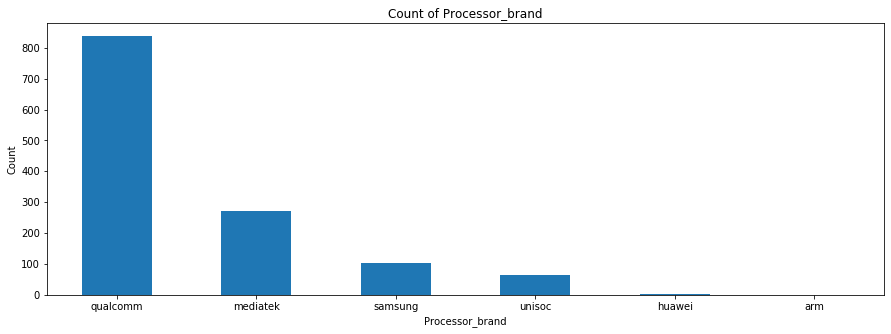

In [64]:
plt.figure(figsize =(15,5))
data1["Processor"].value_counts().plot(kind="bar", xlabel="Processor_brand", ylabel="Count", title= "Count of Processor_brand")
plt.xticks(rotation=0)
plt.show()


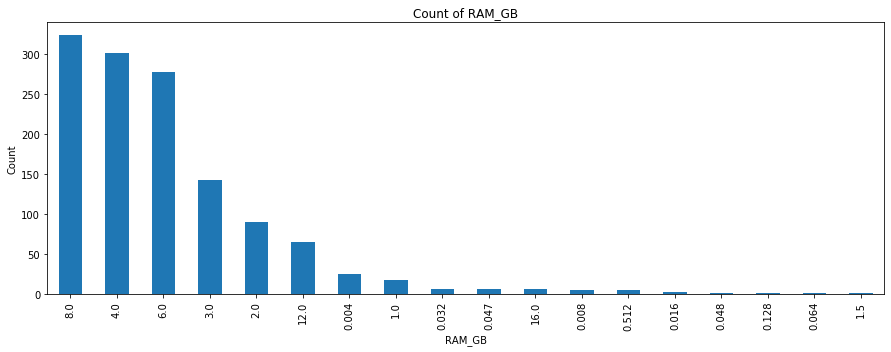

In [65]:
plt.figure(figsize =(15,5))
data1["RAM_GB"].value_counts().plot(kind="bar", xlabel="RAM_GB", ylabel="Count", title= "Count of RAM_GB")
plt.show()

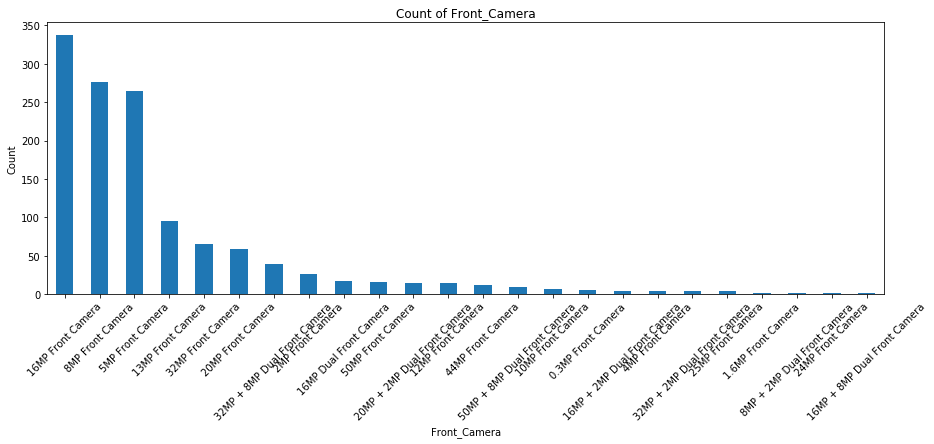

In [66]:
plt.figure(figsize =(15,5))
data1["Front_Camera"].value_counts().plot(kind="bar", xlabel="Front_Camera", ylabel="Count", title= "Count of Front_Camera")
plt.xticks(rotation=45)
plt.show()

##### Price Impact on features: 

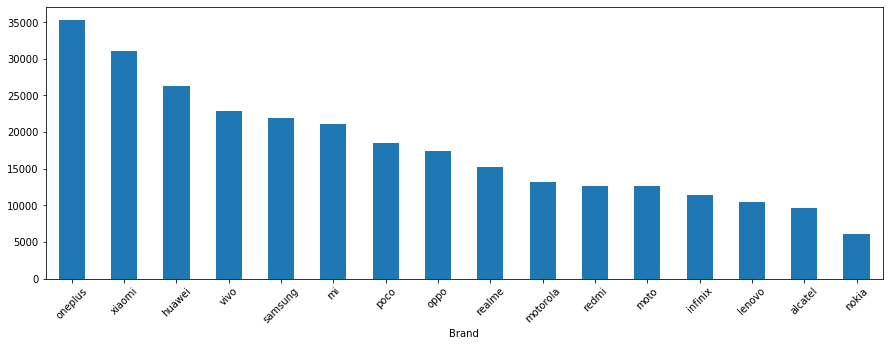

In [67]:
plt.figure(figsize =(15,5))
dataplot = data1.groupby('Brand')['Price_INR'].mean().sort_values(ascending =False)
dataplot.plot(kind='bar', rot=45)

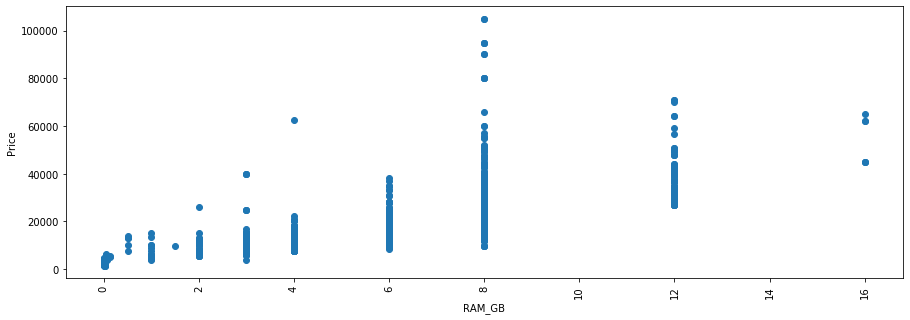

In [68]:
plt.figure(figsize =(15,5))
plt.scatter(x = "RAM_GB",y="Price_INR", data = data1)
plt.xlabel(xlabel ="RAM_GB")
plt.ylabel(ylabel ="Price") 
# data1["Battery"].value_counts().plot(kind="scatter", xlabel="Battery", ylabel="Count", title= "Count of Battery")
plt.xticks(rotation=90)
plt.show()

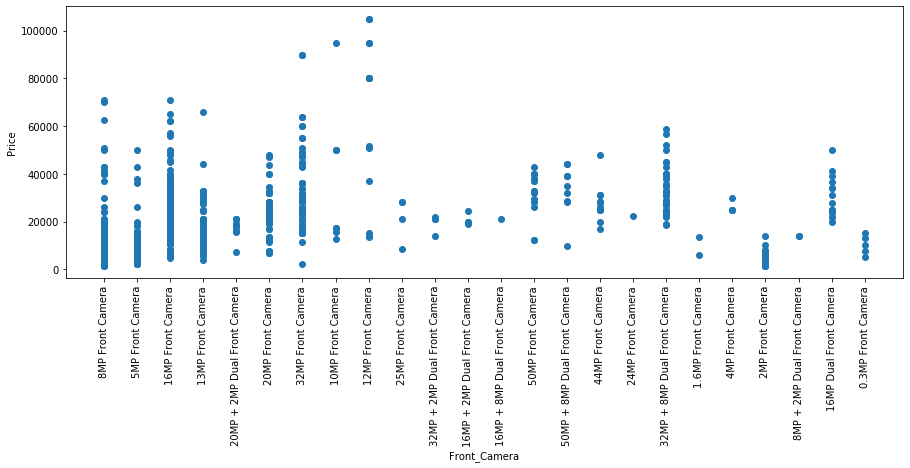

In [69]:
plt.figure(figsize =(15,5))
plt.scatter(x = "Front_Camera",y="Price_INR", data = data1)
plt.xlabel(xlabel ="Front_Camera")
plt.ylabel(ylabel ="Price") 
# data1["Battery"].value_counts().plot(kind="scatter", xlabel="Battery", ylabel="Count", title= "Count of Battery")
plt.xticks(rotation=90)
plt.show()

In [71]:
data1.describe()

,Rating,Number_of_Ratings,RAM_GB,ROM_GB,Battery_mAh,Price_INR
count,1280.000000,1.280000e+03,1280.000000,1280.000000,1280.000000,1280.000000
mean,4.196016,4.822000e+04,5.433777,104.758098,4588.162500,18416.267188
std,0.506525,1.029235e+05,2.827106,70.039621,993.037672,12995.293760
min,0.000000,0.000000e+00,0.004000,0.002000,800.000000,1399.000000
25%,4.200000,1.367000e+03,4.000000,64.000000,4425.000000,9999.000000
50%,4.300000,8.782000e+03,6.000000,128.000000,5000.000000,14999.000000
75%,4.400000,4.361550e+04,8.000000,128.000000,5000.000000,22055.250000
max,4.700000,1.342530e+06,16.000000,512.000000,7000.000000,104999.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x2f690c91b48>,
 'caps': [<matplotlib.lines.Line2D at 0x2f690ca8e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2f690ca5848>],
 'medians': [<matplotlib.lines.Line2D at 0x2f690cafb48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2f690cafc48>],
 'means': []}

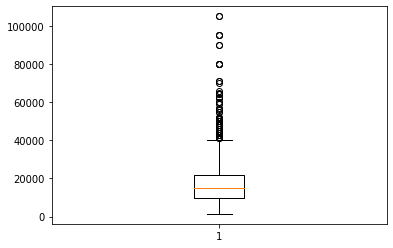

In [72]:
plt.boxplot(x = "Price_INR", data = data1)

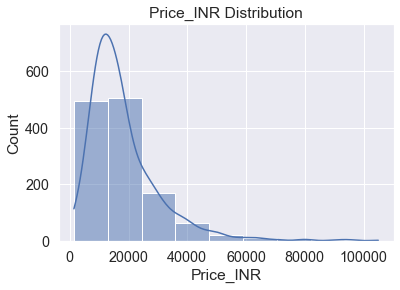

Price_INR Descriptive Statistics


count      1280.0
mean      18416.0
std       12995.0
min        1399.0
25%        9999.0
50%       14999.0
75%       22055.0
max      104999.0
Name: Price_INR, dtype: float64

In [73]:
sns.set(font_scale=1.3)
sns.histplot(data1.Price_INR,bins=9,kde=True)
plt.title('Price_INR Distribution')
plt.show()

print('Price_INR Descriptive Statistics')
data1['Price_INR'].describe().round()

### Handling Outliers 

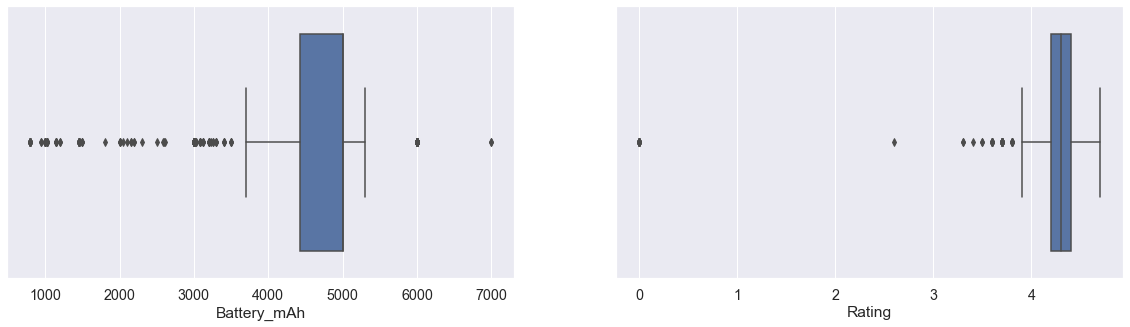

In [74]:
fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.boxplot(x=data1['Battery_mAh'], ax=ax[0])
sns.boxplot(x=data1['Rating'], ax=ax[1])
fig.show()


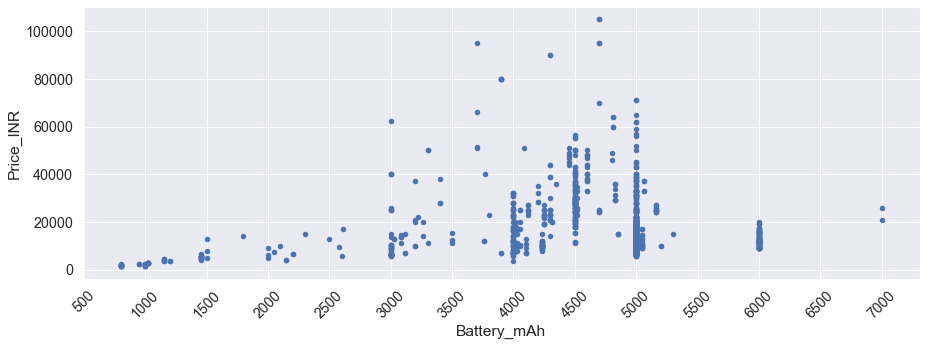

In [75]:
data1.plot(kind='scatter', rot=45, x='Battery_mAh', y='Price_INR',figsize =(15,5), legend = True, 
           xticks = np.arange(500, 7500, step= 500))

Text(0.5, 0, 'RAM_GB')

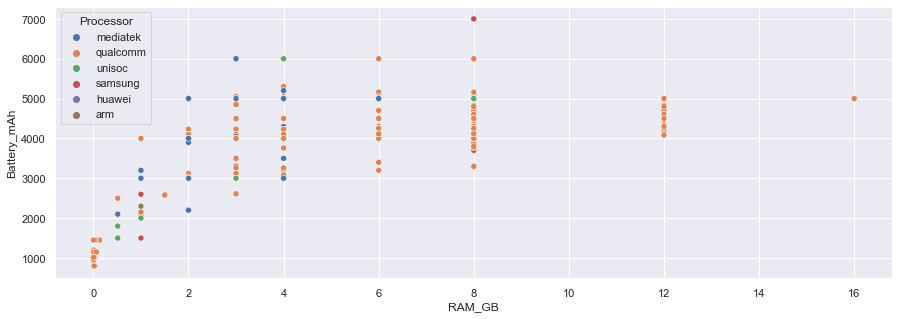

In [76]:
sns.set(rc={"figure.figsize":(15, 5)})

sns.scatterplot(x = 'RAM_GB', y = 'Battery_mAh', data = data1,  hue="Processor")
plt.ylabel('Battery_mAh')
plt.xlabel('RAM_GB')

### Correlations

#### Categorical Variables:

    'Phone_Name', 
    'Brand', 
    'Back_Rare_Camera',
    'Front_Camera', '
    'Processor'

In [77]:
obj_var =  data1.select_dtypes(include = 'object')
obj_var.columns

Index(['Phone_Name', 'Brand', 'RAM', 'ROM_Storage', 'Back_Rare_Camera',
       'Front_Camera', 'Battery', 'Processor'],
      dtype='object')

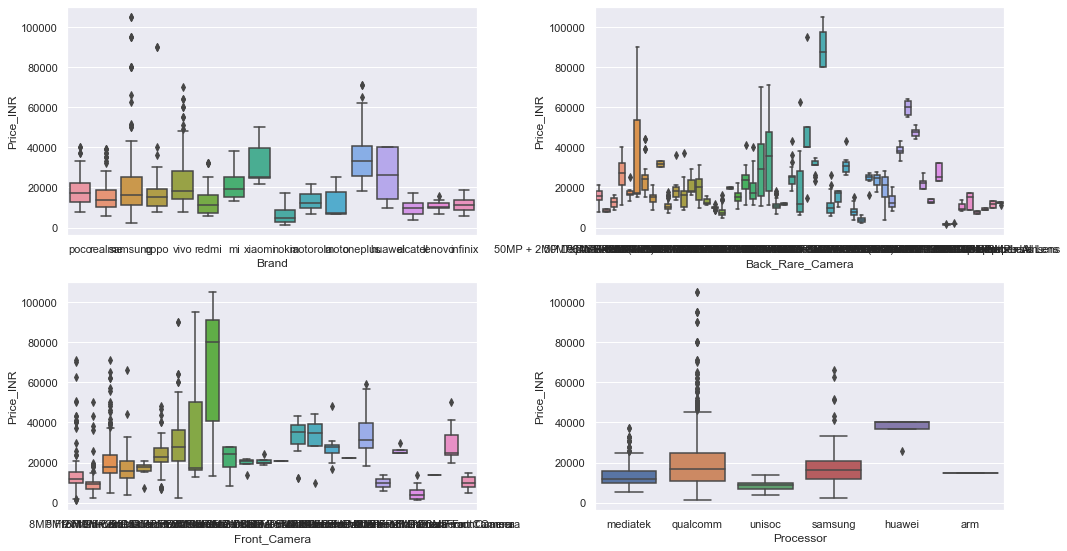

In [78]:
plt.figure(figsize=(15, 15))
plt.subplot(4,2,1)
sns.boxplot(x = 'Brand', y = 'Price_INR', data = data1)
plt.subplot(4,2,2)
sns.boxplot(x = 'Back_Rare_Camera', y = 'Price_INR', data = data1)
plt.subplot(4,2,3)
sns.boxplot(x = 'Front_Camera', y = 'Price_INR', data = data1)
plt.subplot(4,2,4)
sns.boxplot(x = 'Processor', y = 'Price_INR', data = data1)

plt.tight_layout()
plt.show()

In [79]:
corr_matrix = data1.corr()
corr_matrix['Price_INR'].sort_values(ascending=False)

Price_INR            1.000000
ROM_GB               0.745777
RAM_GB               0.718304
Battery_mAh          0.118468
Rating               0.001147
Number_of_Ratings   -0.197043
Name: Price_INR, dtype: float64

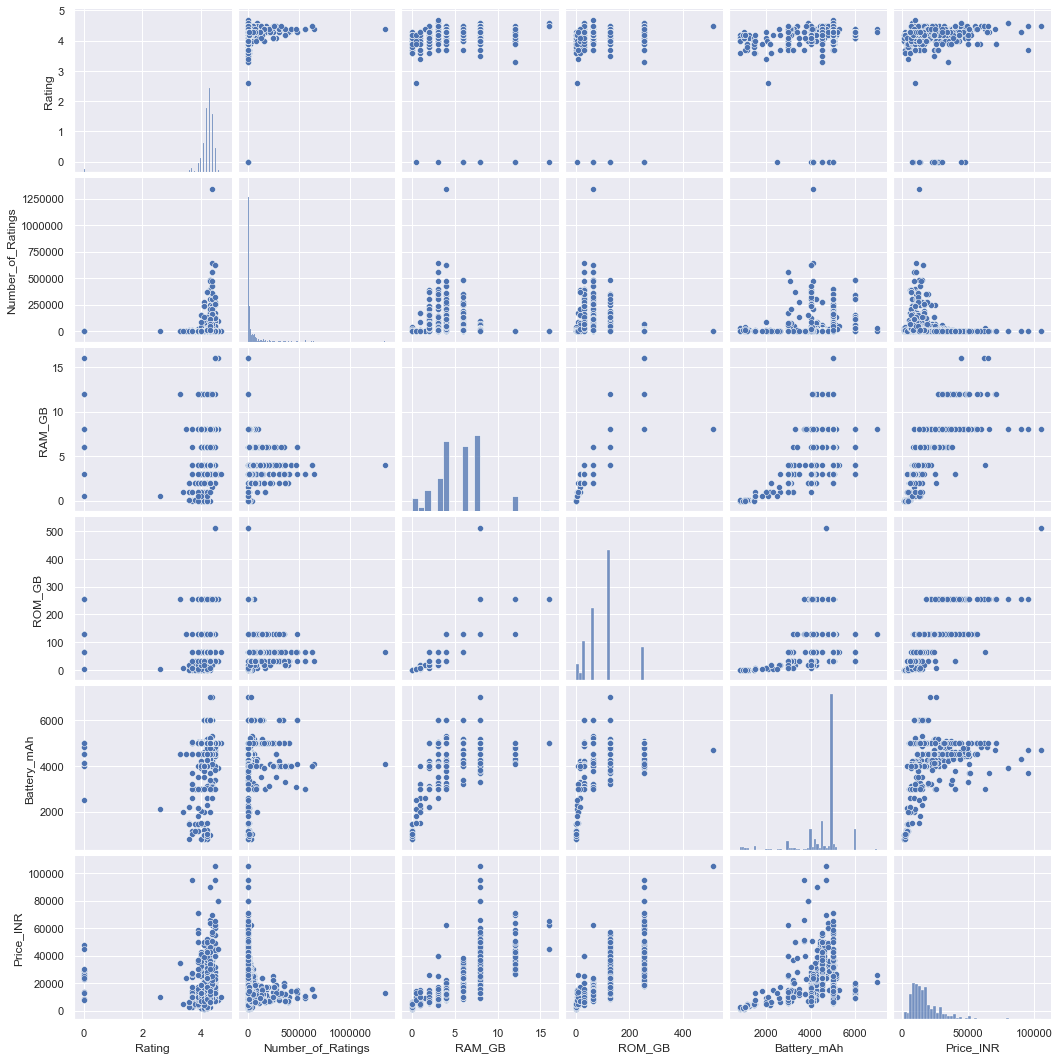

In [80]:
##Use the pairplot() function to display the scatter plots of the relationships between the features.

phone_num = data1.select_dtypes(include= ['float64','int64'])
sns.pairplot(phone_num, kind = 'scatter')

plt.show()

# 2. Objectives


Testing Assumptions for Linear Regression: 
1. Linearity Assumption
2. Homoscedasticity [homo-seedas-ti-city]
3. Normality
4. Multicollinearity = heatmap

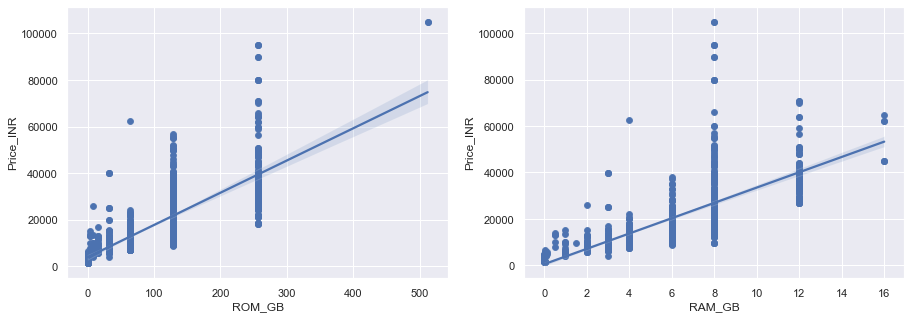

In [81]:
fig,(ax1, ax2) = plt.subplots(figsize = (15,5), ncols=2)

sns.scatterplot(x = "ROM_GB", y= "Price_INR", data = data1, ax = ax1)
sns.regplot(x = "ROM_GB", y= "Price_INR", data = data1, ax=ax1)

sns.scatterplot(x = "RAM_GB", y= "Price_INR", data = data1, ax = ax2)
sns.regplot(x = "RAM_GB", y= "Price_INR", data = data1, ax=ax2)

2. Homoscedasticity

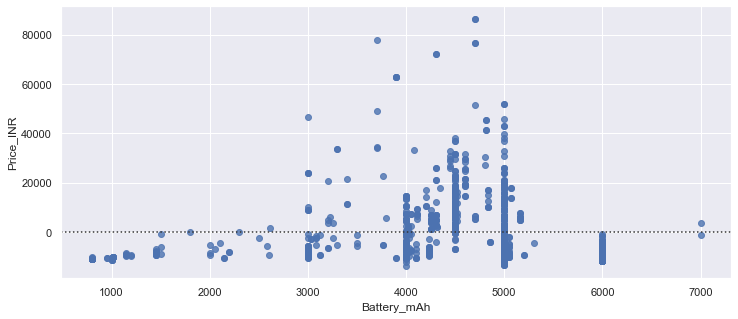

In [82]:
plt.subplots(figsize = (12,5))
sns.residplot(x = "Battery_mAh", y = "Price_INR", data = data1)

From the above plot, we can tell the error variance across the true line is dispersed somewhat not uniformly, but in a funnel like shape. So, the assumption of the homoscedasticity is more likely not met.

3. The linear regression analysis requires the dependent variable, 'price', to be normally distributed. 
    - A histogram, box plot, or a Q-Q-Plot can check if the target variable is normally distributed. 
    - We can also check statistically if the target is normally distributed, using normaltest() function. If the p-value is large (>0.05), the target variable is normally distributed.
    - Square Root Transform (np.sqrt) and the Box-Cox Transform (stats.boxcox from the scipy stats library).

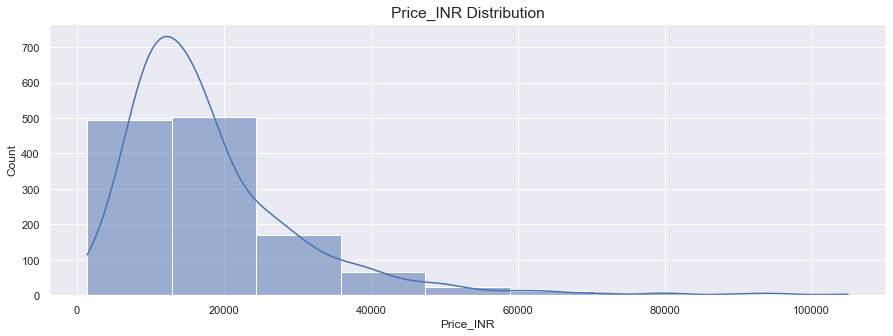

In [83]:
plt.subplots(figsize = (15,5))
sns.set(font_scale=1.3)
sns.histplot(data1.Price_INR,bins=9,kde=True)
plt.title('Price_INR Distribution')
plt.show()

In [84]:
normaltest(data1.Price_INR.values)

NormaltestResult(statistic=696.7243998247365, pvalue=5.107623475392175e-152)

In [85]:
data3 = data1.copy()

#### Log Transformation: 
As we can see, the p-value is very small, so it is not normally distributed.Hence, use Log Transformation
* `np.log()` or `np.log1p`

NormaltestResult(statistic=68.30046848878911, pvalue=1.4748291469643517e-15)

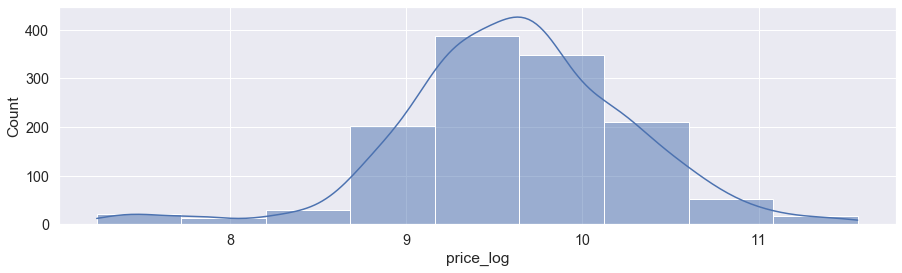

In [86]:
plt.subplots(figsize = (15,4))

data3['price_log'] = np.log(data3.Price_INR)
sns.histplot(data3.price_log,bins=9,kde=True)

normaltest(data3.price_log.values)

In [87]:
cp_results = boxcox(data3.Price_INR)
boxcox_price = cp_results[0]
normaltest(boxcox_price)

NormaltestResult(statistic=26.2232009865702, pvalue=2.021642024623335e-06)

As we can see, the boxcox method transformed the 'price' distribution into a more symmetrical bell curve. It is still not perfect, but it is much closer to being normally distributed. improved p-value

4. Multicollinearity

Use the heatmap() do display all correlation factors of the numeric variables. Do you see any correlations between the independent features?

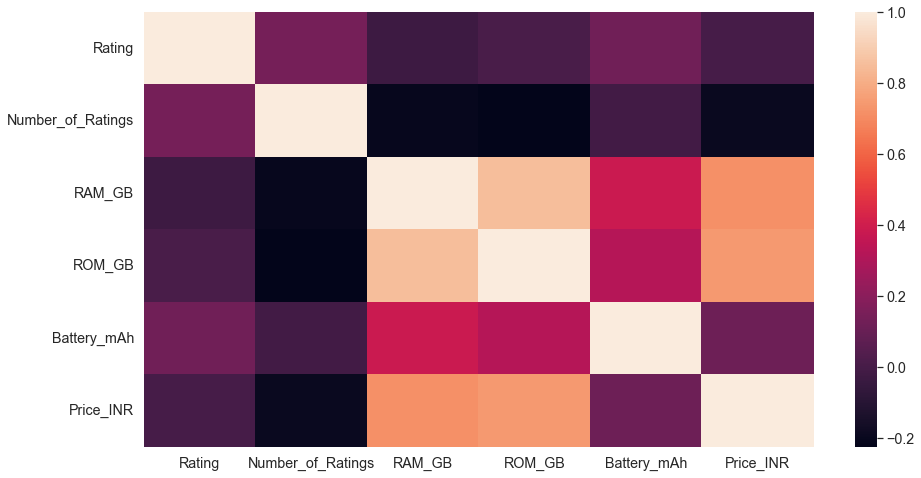

In [88]:
plt.figure(figsize=(15, 8))
sns.heatmap(data1.corr())
plt.show()

The best way to solve for multicollinearity is to use the regularization methods like Ridge or Lasso, 

# 3. Linear Regression Models


In [89]:
corr_matrix = data1.corr()
corr_matrix['Price_INR'].sort_values(ascending=False)

Price_INR            1.000000
ROM_GB               0.745777
RAM_GB               0.718304
Battery_mAh          0.118468
Rating               0.001147
Number_of_Ratings   -0.197043
Name: Price_INR, dtype: float64

In [90]:
data1.drop("Battery", axis= 1, inplace= True)

In [91]:
data1.drop(columns = ["RAM", "ROM_Storage", "Phone_Name"], axis= 1, inplace= True)

In [92]:
data1.columns

Index(['Brand', 'Rating', 'Number_of_Ratings', 'RAM_GB', 'ROM_GB',
       'Back_Rare_Camera', 'Front_Camera', 'Battery_mAh', 'Processor',
       'Price_INR'],
      dtype='object')

#### List of significant variables after Exploratory Data Analysis :

Numerical:

*   Rating
*   Number_of_Ratings
*   RAM_GB
*   ROM_GB

All Categorical:

*   Brand
*   Processor
*   Battery_mAh
*   Back_Rare_Camera
*   Front_Camera

## Checkpoint 3: 


In [93]:
original_data = data1.copy()

In [94]:
phone_data = data1.copy()
phone_data.head()

,Brand,Rating,Number_of_Ratings,RAM_GB,ROM_GB,Back_Rare_Camera,Front_Camera,Battery_mAh,Processor,Price_INR
1,poco,4.2,77128,4.0,64.0,50MP + 2MP,8MP Front Camera,5000,mediatek,11999
3,poco,4.2,22621,4.0,64.0,50MP Dual Rear Camera,5MP Front Camera,5000,mediatek,7749
5,poco,4.2,77128,4.0,64.0,50MP + 2MP,8MP Front Camera,5000,mediatek,11999
6,poco,4.2,22621,4.0,64.0,50MP Dual Rear Camera,5MP Front Camera,5000,mediatek,7749
7,poco,4.2,22621,4.0,64.0,50MP Dual Rear Camera,5MP Front Camera,5000,mediatek,7749


We can split the data into the features X and target y

In [95]:
X = phone_data.drop("Price_INR", axis=1)
X.columns

Index(['Brand', 'Rating', 'Number_of_Ratings', 'RAM_GB', 'ROM_GB',
       'Back_Rare_Camera', 'Front_Camera', 'Battery_mAh', 'Processor'],
      dtype='object')

In [96]:
X

,Brand,Rating,Number_of_Ratings,RAM_GB,ROM_GB,Back_Rare_Camera,Front_Camera,Battery_mAh,Processor
1,poco,4.2,77128,4.0,64.0,50MP + 2MP,8MP Front Camera,5000,mediatek
3,poco,4.2,22621,4.0,64.0,50MP Dual Rear Camera,5MP Front Camera,5000,mediatek
5,poco,4.2,77128,4.0,64.0,50MP + 2MP,8MP Front Camera,5000,mediatek
6,poco,4.2,22621,4.0,64.0,50MP Dual Rear Camera,5MP Front Camera,5000,mediatek
7,poco,4.2,22621,4.0,64.0,50MP Dual Rear Camera,5MP Front Camera,5000,mediatek
...,...,...,...,...,...,...,...,...,...
1821,infinix,4.3,12319,6.0,64.0,50MP + 2MP Depth Sensor + 2MP Macro Sensor,16MP Front Camera,5000,mediatek
1823,infinix,4.3,50667,4.0,64.0,50 MP + 2 MP + AI Lens,8MP Front Camera,5000,mediatek
1824,infinix,4.3,50667,4.0,128.0,50 MP + 2 MP + AI Lens,8MP Front Camera,5000,mediatek
1826,infinix,4.0,5240,8.0,128.0,50 MP + Depth Lens,8MP Front Camera,5000,unisoc


In [97]:
y = phone_data["Price_INR"].copy()
y.head()

1    11999
3     7749
5    11999
6     7749
7     7749
Name: Price_INR, dtype: int64

In [98]:
cat_columns = [key for key, value in phone_data.dtypes.iteritems() if value =='O']
numeric_columns = [key for key, value in phone_data.dtypes.iteritems() if value !='O']
print(numeric_columns)
print(cat_columns)

# for column in  cat_columns: 
#     print("column name:", column)
#     print("value_counts:")
#     print( X[column].value_counts())
#     print("\n ")

['Rating', 'Number_of_Ratings', 'RAM_GB', 'ROM_GB', 'Battery_mAh', 'Price_INR']
['Brand', 'Back_Rare_Camera', 'Front_Camera', 'Processor']


## OneHotEncoder

In [99]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [100]:
## dont use this code: 
# X_num =phone_data[numeric_columns].to_numpy() 

# X_cat =OneHotEncoder().fit_transform(phone_data[cat_columns]).toarray() 

# X_onehotencode =np.concatenate((X_cat,X_num), axis = 1)
# X_onehotencode

In [101]:
phone_dummy = pd.get_dummies(data= phone_data, columns = cat_columns)
phone_dummy.columns

Index(['Rating', 'Number_of_Ratings', 'RAM_GB', 'ROM_GB', 'Battery_mAh',
       'Price_INR', 'Brand_alcatel', 'Brand_huawei', 'Brand_infinix',
       'Brand_lenovo',
       ...
       'Front_Camera_50MP Front Camera', 'Front_Camera_5MP Front Camera',
       'Front_Camera_8MP + 2MP Dual Front Camera',
       'Front_Camera_8MP Front Camera', 'Processor_arm', 'Processor_huawei',
       'Processor_mediatek', 'Processor_qualcomm', 'Processor_samsung',
       'Processor_unisoc'],
      dtype='object', length=105)

In [102]:
phone_dummy.head()

,Rating,Number_of_Ratings,RAM_GB,ROM_GB,Battery_mAh,Price_INR,Brand_alcatel,Brand_huawei,Brand_infinix,Brand_lenovo,...,Front_Camera_50MP Front Camera,Front_Camera_5MP Front Camera,Front_Camera_8MP + 2MP Dual Front Camera,Front_Camera_8MP Front Camera,Processor_arm,Processor_huawei,Processor_mediatek,Processor_qualcomm,Processor_samsung,Processor_unisoc
1,4.2,77128,4.0,64.0,5000,11999,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,4.2,22621,4.0,64.0,5000,7749,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5,4.2,77128,4.0,64.0,5000,11999,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6,4.2,22621,4.0,64.0,5000,7749,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7,4.2,22621,4.0,64.0,5000,7749,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [103]:
phone_dummy.columns

Index(['Rating', 'Number_of_Ratings', 'RAM_GB', 'ROM_GB', 'Battery_mAh',
       'Price_INR', 'Brand_alcatel', 'Brand_huawei', 'Brand_infinix',
       'Brand_lenovo',
       ...
       'Front_Camera_50MP Front Camera', 'Front_Camera_5MP Front Camera',
       'Front_Camera_8MP + 2MP Dual Front Camera',
       'Front_Camera_8MP Front Camera', 'Processor_arm', 'Processor_huawei',
       'Processor_mediatek', 'Processor_qualcomm', 'Processor_samsung',
       'Processor_unisoc'],
      dtype='object', length=105)

In [104]:
# plt.figure(figsize=(15, 8))
# sns.heatmap(phone_dummy.corr())
# plt.show()

In [105]:
## export this cleaned dataset: 

# phone_dummy.to_csv('phone_dummy_data.csv', index=False)

### Train Test Split

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X = phone_dummy.drop("Price_INR", axis=1)
X.shape

(1280, 104)

In [108]:
y = phone_dummy.Price_INR
y.shape

(1280,)

In [109]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

print("number of test samples :", X_test.shape)
print("number of training samples:",X_train.shape)

number of test samples : (384, 104)
number of training samples: (896, 104)


# Plain Linear regression: 


In [110]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, scale
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [111]:
def  plot_dis(y,y_predicted_):
    
    plt.figure(figsize=(15,5))
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(y_predicted_, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in INR)')
    plt.ylabel('Proportion of Mobile Phones')

    plt.show()
    plt.close()

In [112]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_predicted = lm.predict(X_test)

In [113]:
print("Linear regression: R^2 on training  data",lm.score(X_train, y_train))
print("Linear regression: R^2 on testing data ",lm.score(X_test,y_test), "\n")

print("Linear regression: r2_score", r2_score(y_test, y_predicted))

Linear regression: R^2 on training  data 0.8446594131594203
Linear regression: R^2 on testing data  0.7787271176810859 

Linear regression: r2_score 0.7787271176810859


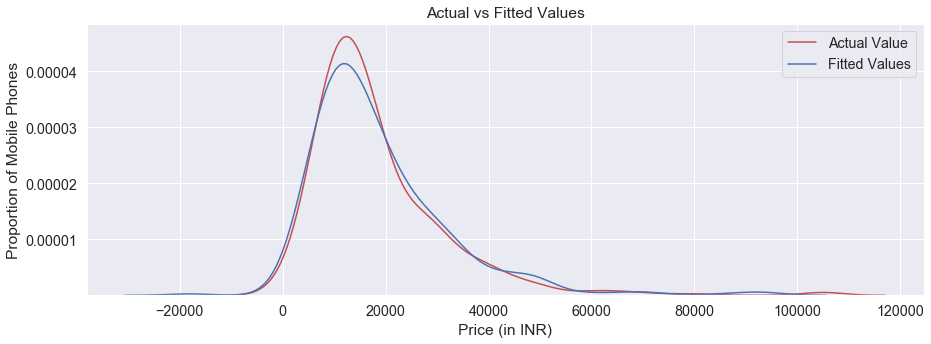

In [114]:
plot_dis(y_test,y_predicted)

### Standardize the Data: we can skip this part 

We standardize features by removing the mean and scaling to unit variance using StandardScaler, we create a StandardScaler object:

In [115]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss

StandardScaler()

In [116]:
X_train=ss.fit_transform(X_train)
lm.fit(X_train,y_train)
X_test=ss.transform(X_test)
y_predicted = lm.predict(X_test)

In [117]:
print("Linear regression: R^2 on training  data",lm.score(X_train, y_train))
print("Linear regression: R^2 on testing data ",lm.score(X_test,y_test), "\n")

print("Linear regression: r2_score", r2_score(y_test, y_predicted))

Linear regression: R^2 on training  data 0.8446569713383948
Linear regression: R^2 on testing data  -9.570604243750924e+20 

Linear regression: r2_score -9.570604243750924e+20


If the R squared is negative, it suggests the overfitting, when a statistical model fits exactly against its training data.

https://towardsdatascience.com/explaining-negative-r-squared-17894ca26321

In [118]:
mse = mean_squared_error(y_test, y_predicted)
mse

1.6977658397183086e+29

In [119]:
rmse = np.sqrt(mse)
rmse

412039541757621.7

# Polynomial Regression


Polynomial transform is a simple way to increase the complexity of the model, but we must be mindful of overfilling. Below, we will perform a second degree (degree=2) polynomial transformation.

In [120]:
# pf = PolynomialFeatures(degree=2, include_bias=False) ## exclude bias means no intercept term and inetrcepts cols == 1
# X_pf = pf.fit_transform(X_train)

# X_pf_ss = s.fit_transform(X_pf)

numeric_columns

['Rating', 'Number_of_Ratings', 'RAM_GB', 'ROM_GB', 'Battery_mAh', 'Price_INR']

In [121]:
# sns.lmplot(x = 'Battery_mAh', y = 'Price_INR', data = data1, order=2)

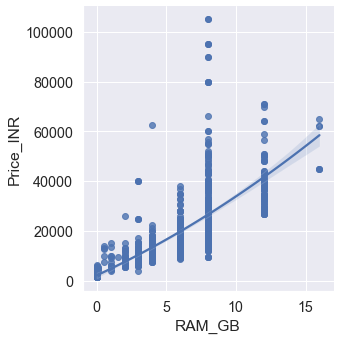

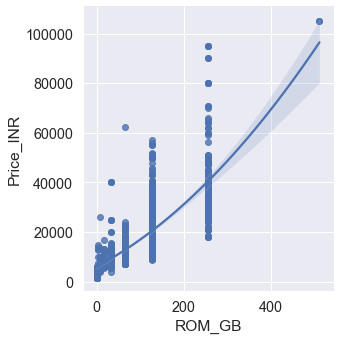

In [122]:
sns.lmplot(x = 'RAM_GB', y = 'Price_INR', data = data1, order=2)

sns.lmplot(x = 'ROM_GB', y = 'Price_INR', data = data1, order=2)


In [123]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, scale


pf = PolynomialFeatures(degree=2, include_bias=False)
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.transform(X_test)

In [124]:
print(X_train_pf.shape)
print(X_test_pf.shape)

(896, 5564)
(384, 5564)


Altogether, we have 5564 features. Now, we fit the model with the newly created features.

In [125]:
lm.fit(X_train_pf, y_train)
y_predicted = lm.predict(X_test_pf)

In [126]:
print("Polynomial Regression: R^2 on training  data",lm.score(X_train_pf, y_train))
print("Polynomial Regression: R^2 on testing data ",lm.score(X_test_pf,y_test), "\n")

print("Polynomial Regression: r2_score", r2_score(y_test, y_predicted))


Polynomial Regression: R^2 on training  data 0.9934009137471123
Polynomial Regression: R^2 on testing data  -3.406818440863563e+19 

Polynomial Regression: r2_score -3.406818440863563e+19


We see the model has a negative  𝑅2 on the test data set, this is sign of overfiting.

### Pipeline and GridSearch

In [127]:
pipe=Pipeline([('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())])

In [128]:
param_grid = {
    "polynomial__degree": [1, 2, 3],
    "model__normalize":[True, False]}

In [129]:
search = GridSearchCV(pipe, param_grid, n_jobs=2)
pipe.fit(X_train, y_train)
search.fit(X_test, y_test)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', LinearRegression())]),
             n_jobs=2,
             param_grid={'model__normalize': [True, False],
                         'polynomial__degree': [1, 2, 3]})

In [130]:
 ## We can obtain the estimator with the best parameters and assign it to the variable best, as follows:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('model', LinearRegression(normalize=False))])

We see the degree is one and normalize is `False`.

In [131]:
### using Cross-validation technique: 
print("Cross-validation (PolynomialFeatures): R^2 on testing data : " ,best.score(X_test,y_test))

Cross-validation (PolynomialFeatures): R^2 on testing data :  0.9996522338862249


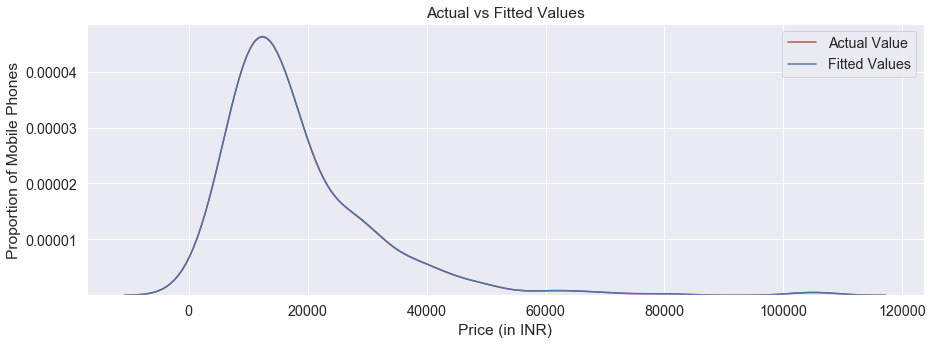

In [132]:
predicted=best.predict(X_test)
plot_dis(y_test,predicted)

#####  `StandardScaler()` 
[Scaling Toward Data Science](https://towardsdatascience.com/what-is-feature-scaling-why-is-it-important-in-machine-learning-2854ae877048)

In [133]:
pipe =Pipeline([ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), 
                ('model',LinearRegression())])

param_grid = {
    "polynomial__degree": [1, 2, 3],
    "model__normalize":[True, False]}

In [134]:
search = GridSearchCV(pipe, param_grid, n_jobs=2)
pipe.fit(X_train, y_train)
search.fit(X_test, y_test)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('model', LinearRegression())]),
             n_jobs=2,
             param_grid={'model__normalize': [True, False],
                         'polynomial__degree': [1, 2, 3]})

In [135]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()),
                ('model', LinearRegression(normalize=True))])

In [136]:
print("best_score_: ",search.best_score_)
print("best_params_: ",search.best_params_)

best_score_:  -1.0100422483348802e+23
best_params_:  {'model__normalize': True, 'polynomial__degree': 2}


***Run prediction after getting best model(best_estimator_), best_score_, best_params_**

Cross-validation (PolynomialFeatures): R^2 on testing data :  0.9996516135947193
Cross-validation (PolynomialFeatures): R2-score on testing data :  0.9996516135947193


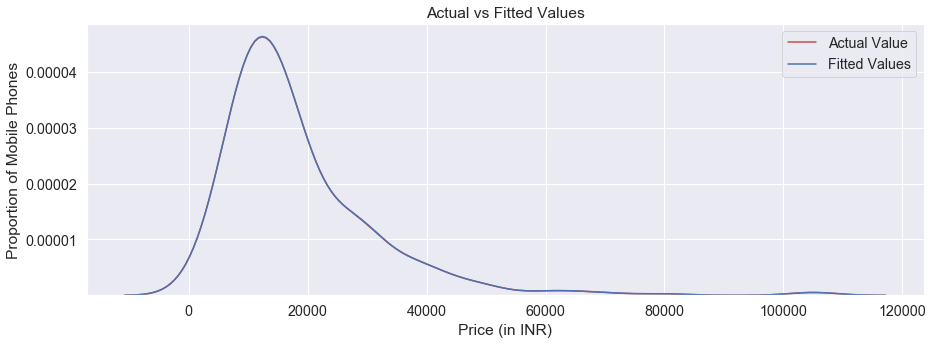

In [137]:
print("Cross-validation (PolynomialFeatures): R^2 on testing data : " ,best.score(X_test,y_test))
predicted=best.predict(X_test)
print("Cross-validation (PolynomialFeatures): R2-score on testing data : " ,r2_score(y_test, predicted))
plot_dis(y_test,predicted)

There is good effect of scaling features on model performance and R- squared increased towards 1.0

In [138]:
RMSE = np.sqrt(mean_squared_error(y_test, predicted))
print(RMSE)
print(mean_squared_error(y_test, predicted))

248.59925128875182
61801.58774132797


Both the MAE and RMSE can range from 0 to ∞. They are negatively-oriented scores: Lower values are better.

# Ridge Regression

In [139]:
pipe =Pipeline([ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),
       ('ss',StandardScaler() ), 
       ('model',Ridge(alpha=0.1))
      ])

param_grid = {
    "polynomial__degree": [1,2,3,4],
    "model__alpha":[1e-08, 1e-05,0.0001,0.001,0.01,0.1,1,10]
}

In [140]:
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('model', Ridge(alpha=0.1))]),
             n_jobs=2,
             param_grid={'model__alpha': [1e-08, 1e-05, 0.0001, 0.001, 0.01,
                                          0.1, 1, 10],
                         'polynomial__degree': [1, 2, 3, 4]})

In [141]:
## working of best selected model: 
df = pd.DataFrame(search.cv_results_)
df.sort_values(by = "rank_test_score").head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_polynomial__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
28,0.024901,0.002144,0.005485,0.000442,10,1,"{'model__alpha': 10, 'polynomial__degree': 1}",0.794547,0.728720,0.790045,0.658137,0.883649,0.771020,0.075010,1
24,0.028143,0.005896,0.003129,0.006258,1,1,"{'model__alpha': 1, 'polynomial__degree': 1}",0.792738,0.726558,0.790895,0.653474,0.880446,0.768822,0.075644,2
20,0.020063,0.000912,0.006611,0.003377,0.1,1,"{'model__alpha': 0.1, 'polynomial__degree': 1}",0.792528,0.726178,0.790952,0.652908,0.880043,0.768522,0.075731,3


In [142]:
print("best_score_: ",search.best_score_)
print("best_params_: ",search.best_params_)
best_model=search.best_estimator_
print(best_model)

best_score_:  0.7710198620150133
best_params_:  {'model__alpha': 10, 'polynomial__degree': 1}
Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('ss', StandardScaler()), ('model', Ridge(alpha=10))])


### Ridge Regression: feature_importances

In [151]:
# Best_features = search.feature_importances_
# Best_features

Cross-validation (PolynomialFeatures + Ridge regression): R^2 on testing data :  0.9996516135947193
Cross-validation (PolynomialFeatures + Ridge regression): R2-score on testing data :  0.9996516135947193


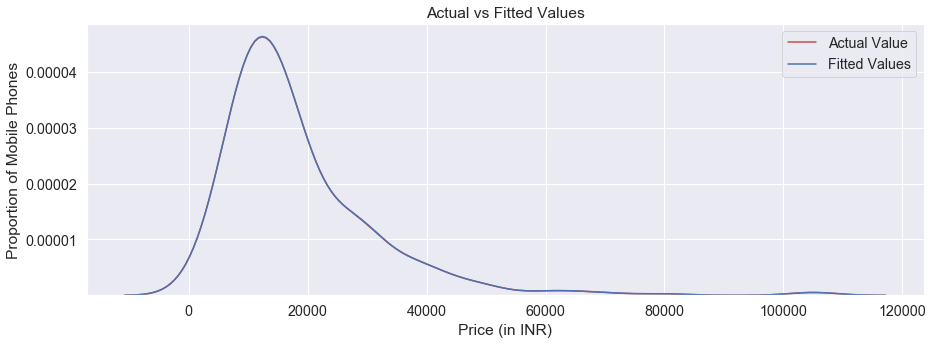

In [152]:
## after selecting best model then run prediction on X_test:

print("Cross-validation (PolynomialFeatures + Ridge regression): R^2 on testing data : " ,best.score(X_test,y_test))
predicted=best.predict(X_test)
print("Cross-validation (PolynomialFeatures + Ridge regression): R2-score on testing data : " ,r2_score(y_test, predicted))
plot_dis(y_test,predicted)

### Only Ridge Regression (without polynomial features): 

without using `SatndardScaler()`, `PolynomialFeatures()` give us low r-squared and R2_score values. hence, not recommended

In [145]:
R = Ridge(alpha=0.01)
R.fit(X_train, y_train)
R_predicted = R.predict(X_test)

In [146]:
print("Ridge : R^2 on training  data ",R.score(X_train, y_train))
print("Ridge : R^2 on testing data ",R.score(X_test,y_test))

print("Ridge : r2_score", r2_score(y_test, R_predicted))

Ridge : R^2 on training  data  0.844659412908688
Ridge : R^2 on testing data  0.7800640759806872
Ridge : r2_score 0.7800640759806872


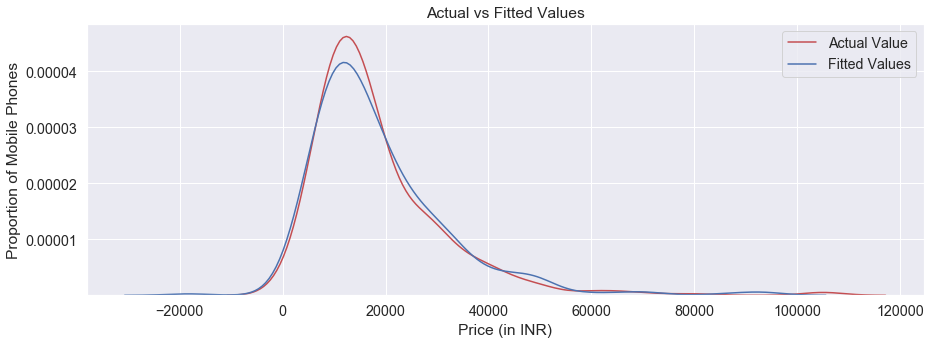

In [147]:
plot_dis(y_test,R_predicted)

In [148]:
# plot_coef(X,R)

# LASSO Regression

In [189]:
pipe = Pipeline([ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),
       ('ss',StandardScaler() ), 
       ('model',Lasso(alpha=0.1, tol = 0.2))] )
pipe

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()),
                ('model', Lasso(alpha=0.1, tol=0.2))])

In [190]:
param_grid = {
    "polynomial__degree": [1,2,3,4],
    "model__alpha":[1e-08, 1e-05,0.0001,0.001,0.01,0.1,1,10]
}

In [191]:
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('model', Lasso(alpha=0.1, tol=0.2))]),
             n_jobs=2,
             param_grid={'model__alpha': [1e-08, 1e-05, 0.0001, 0.001, 0.01,
                                          0.1, 1, 10],
                         'polynomial__degree': [1, 2, 3, 4]})

In [192]:
df = pd.DataFrame(search.cv_results_)
df.sort_values(by = "rank_test_score").head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_polynomial__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
28,0.070852,0.002958,0.026729,0.004001,10,1,"{'model__alpha': 10, 'polynomial__degree': 1}",0.784302,0.683334,0.749211,0.644868,0.861173,0.744578,0.076009,1
24,0.017647,0.009647,0.012756,0.005925,1,1,"{'model__alpha': 1, 'polynomial__degree': 1}",0.783294,0.681106,0.747875,0.643991,0.859172,0.743087,0.075864,2
20,0.058303,0.015465,0.021735,0.003517,0.1,1,"{'model__alpha': 0.1, 'polynomial__degree': 1}",0.783174,0.680876,0.747754,0.643905,0.858964,0.742935,0.075846,3


In [193]:
print("best scores: ",search.best_score_)
print("best parameters : ", search.best_params_)
best = search.best_estimator_
print("best model : ", best)

best scores:  0.7445778215740549
best parameters :  {'model__alpha': 10, 'polynomial__degree': 1}
best model :  Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('ss', StandardScaler()), ('model', Lasso(alpha=10, tol=0.2))])


Cross-validation (PolynomialFeatures + Lasso regression): R^2 on testing data :  0.7902183470329915
Cross-validation (PolynomialFeatures + Lasso regression): R2-score on testing data :  0.7902183470329915


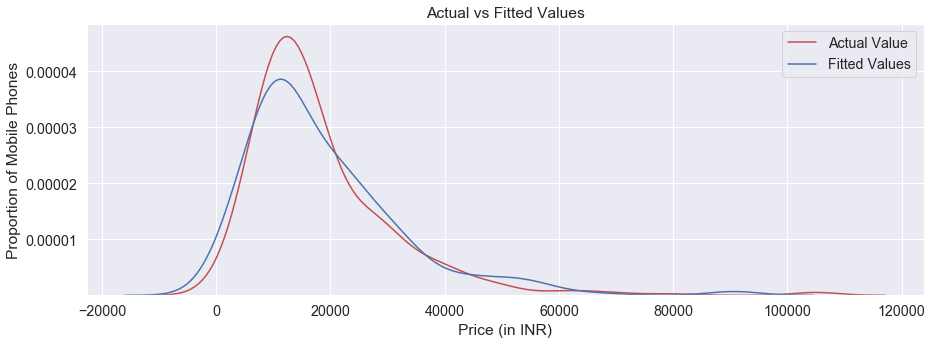

In [194]:
print("Cross-validation (PolynomialFeatures + Lasso regression): R^2 on testing data : " ,best.score(X_test,y_test))
predicted=best.predict(X_test)
print("Cross-validation (PolynomialFeatures + Lasso regression): R2-score on testing data : " ,r2_score(y_test, predicted))
plot_dis(y_test,predicted)

Lasso regression doesnt do a great job. Model performance dropped as R-squared and R2_score dropped from 0.99 to 0.79

# Elastic Net

In [196]:
pipe = Pipeline([
    ('polynomial', PolynomialFeatures(degree= 2, include_bias=False)), 
    ('ss', StandardScaler()), 
    ('model', ElasticNet(alpha=0.1, l1_ratio=0.1))
])


In [197]:
param_grid = {
    "polynomial__degree": [ 1, 2,3,4],
    "model__alpha":[1e-08, 1e-05,0.0001,0.001,0.01,0.1,1,10],
    "model__l1_ratio":[0.1,0.25,0.5,0.75,0.9]
}

In [198]:
search = GridSearchCV(pipe,param_grid, n_jobs = 2)
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('model',
                                        ElasticNet(alpha=0.1, l1_ratio=0.1))]),
             n_jobs=2,
             param_grid={'model__alpha': [1e-08, 1e-05, 0.0001, 0.001, 0.01,
                                          0.1, 1, 10],
                         'model__l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9],
                         'polynomial__degree': [1, 2, 3, 4]})

In [199]:
df = pd.DataFrame(search.cv_results_)
df.sort_values(by = "rank_test_score").head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__l1_ratio,param_polynomial__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
157,0.934333,0.232916,0.083789,0.012484,10,0.9,2,"{'model__alpha': 10, 'model__l1_ratio': 0.9, '...",0.861201,0.812023,0.816311,0.812745,0.905088,0.841473,0.036774,1
125,1.687815,0.182996,0.057387,0.013765,1,0.25,2,"{'model__alpha': 1, 'model__l1_ratio': 0.25, '...",0.865249,0.805857,0.821120,0.814467,0.898508,0.841040,0.035297,2
121,2.213988,1.092974,0.075486,0.042977,1,0.1,2,"{'model__alpha': 1, 'model__l1_ratio': 0.1, 'p...",0.863049,0.809651,0.819756,0.812258,0.899279,0.840799,0.035050,3


In [200]:
print("best scores: ",search.best_score_)
print("best parameters : ", search.best_params_, "\n")
best = search.best_estimator_
print("best model : ", best)

best scores:  0.8414734265997355
best parameters :  {'model__alpha': 10, 'model__l1_ratio': 0.9, 'polynomial__degree': 2} 

best model :  Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()),
                ('model', ElasticNet(alpha=10, l1_ratio=0.9))])


Cross-validation (PolynomialFeatures + Lasso regression): R^2 on testing data :  -6.102162266503638
Cross-validation (PolynomialFeatures + Lasso regression): R2-score on testing data :  -6.102162266503638


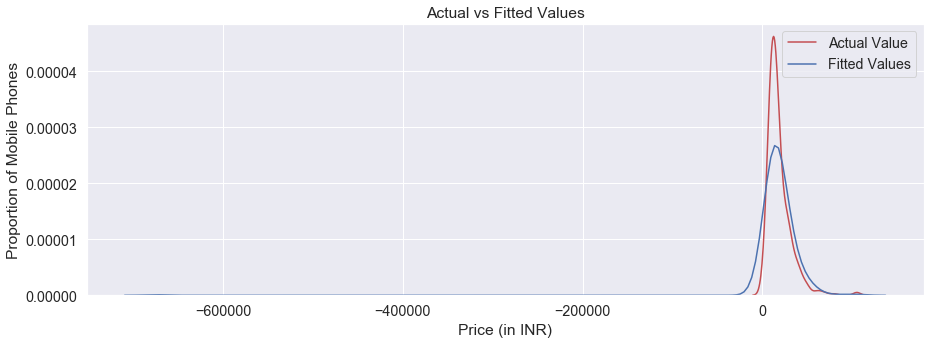

In [201]:
print("Cross-validation (PolynomialFeatures + Lasso regression): R^2 on testing data : " ,best.score(X_test,y_test))
predicted=best.predict(X_test)
print("Cross-validation (PolynomialFeatures + Lasso regression): R2-score on testing data : " ,r2_score(y_test, predicted))
plot_dis(y_test,predicted)

#### R-squared scores and R2_scores: 

- ElasticNet model have worst R-squared = -6.102 than Lasso R-squared = 0.79 and Best is Ridge = 0.999 using same `GridSearchCV()` with `PolynomialFeatures()`

## Regression Models & Results

* Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.

- Divided the dataset into a 30% test set and a 70% train set to understand the model performance on the new data. 


1. Linear regression: 
Applied linear regression model to fit the train set and predict values on the test set
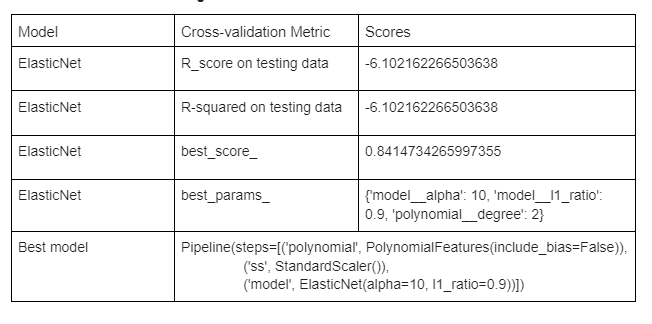


The closer R squared to 1, the better the fit of the model. 

2. Linear regression with Scaling: 
Scaled data suing StandardScaler methods and applied linear regression model to fit the train set and predict values on the test set

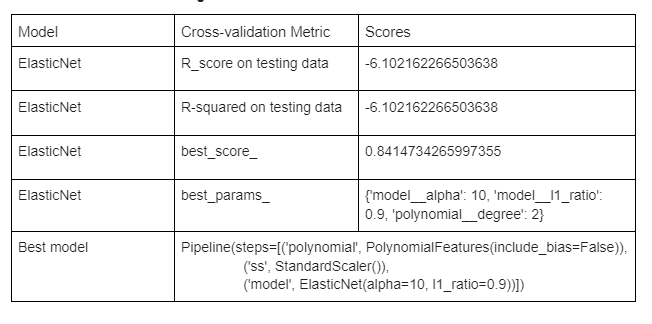


If the R squared is negative, it suggests overfitting, when a statistical model fits exactly against its training data.
The closer R squared to 1, the better the fit of the model, and the better we did in regards to explaining the overall variance. for example, We can always add more features. Even if those features don't have any predictive power, they will never bring down the R-squared score. If you were to add on another feature and it didn't have any predictive power, we can just set that coefficient to 0 and it wouldn't bring down our R-squared. 


3. Polynomial + linear regression 
Polynomial transform is a simple way to increase the complexity of the model, but we must be mindful of overfilling. Below, we will perform a second-degree (degree=2) polynomial transformation.

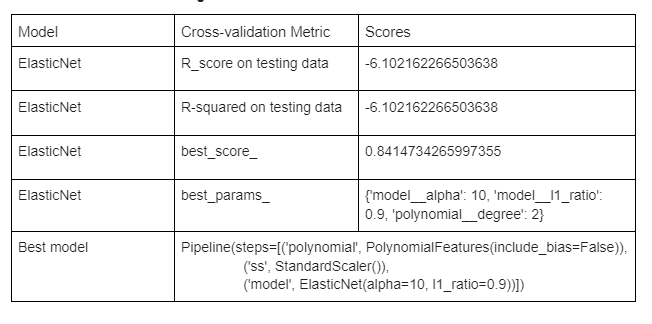


We see the model has a negative 𝑅2 on the test data set, this is a sign of overfitting when a statistical model fits exactly against its training data.


4. Polynomial regression + regularization methods using GridSearchCV and pipeline

        4.1 Linear regression with polynomial features
    
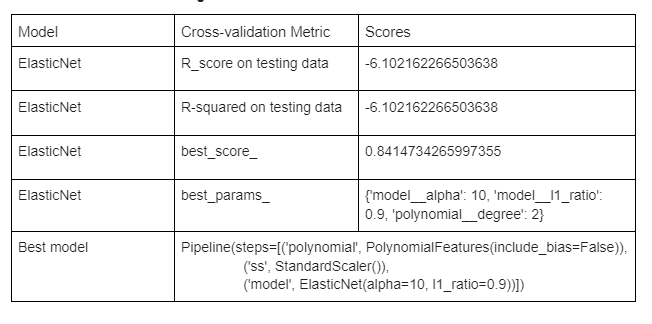

    4.2 Linear regression with polynomial features with StandardScaler()

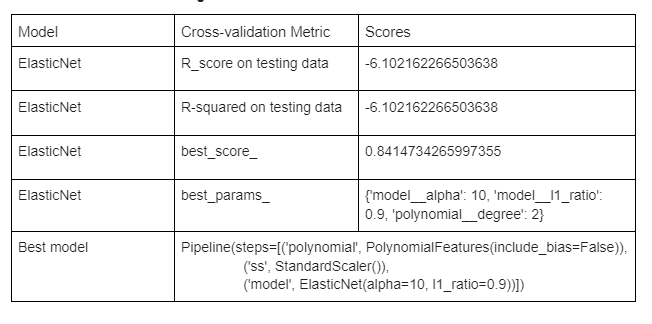

Both the MAE and RMSE can range from 0 to ∞. They are negatively-oriented scores: Lower values are better

    4.3 Ridge Regression:
    
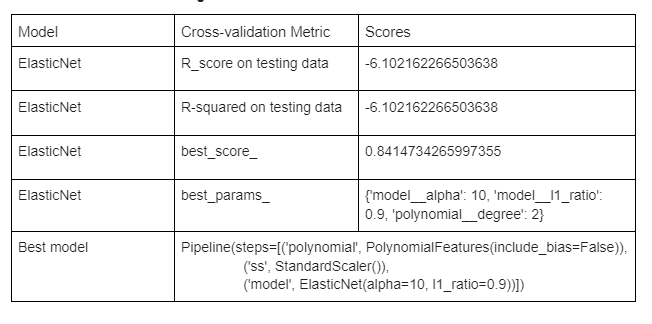

    4.4 Ridge Regression without polynomial features
    
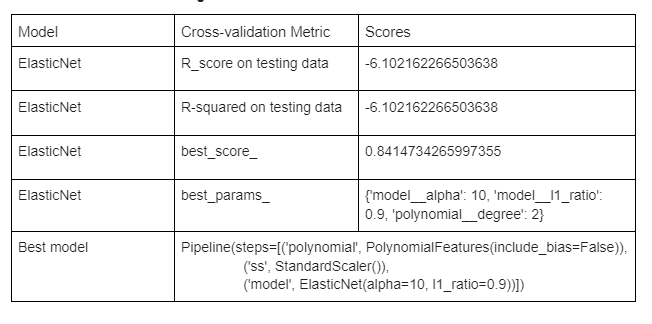

without using SatndardScaler(), PolynomialFeatures() give us low r-squared and R2_score values. hence, not recommended. 

    4.5 Lasso Regression: 
    
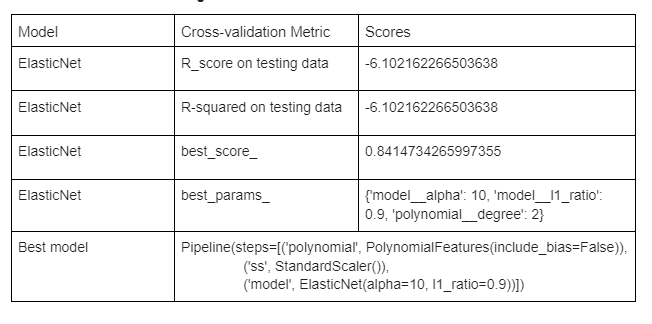

Lasso regression doesn't do a great job. Model performance dropped as R-squared and R2_score dropped from 0.99 to 0.79

    4.6 ElasticNet Regression
    
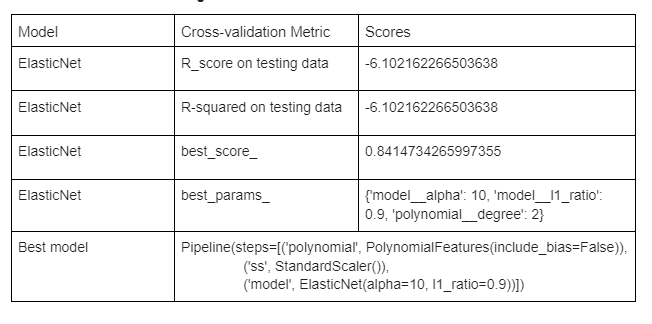


# 4. Insights and key findings


* A paragraph explaining which of your regressions you recommend as a final model that best fits your needs regarding accuracy and explainability.

R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable in a regression model.  An R2 of 1.0 indicates that the data perfectly fit the linear model. Any R2 value less than 1.0 indicates that at least some variability in the data cannot be accounted for by the model (e.g., an R2 of 0.5 indicates that 50% of the variability in the outcome data cannot be explained by the model)

- R-squared for ElasticNet is the lowest = -6.102 than 
- R-squared for Lasso Regression = 0.79

Here we can see that the Ridge regression  model has the highest R-squared values 
R-squared =  0.999 using GridSearchCV() AND
best model =  Pipeline(steps=[('polynomial',  PolynomialFeatures(degree=1, include_bias=False)), ('ss', StandardScaler()), ('model', Ridge(alpha=10))])



* Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.

The value R2 quantifies goodness of fit and a higher R-squared indicates the model is a good fit, Hence, the Best model is Ridge Regression to fit the overall data with perfect bias-variance trade-off. 
which factors drive mobile phone prices up? 

**Below are the features:**

    ROM_GB            =    0.745777
    RAM_GB               0.718304
    Battery_mAh          0.118468
    Rating               0.001147
    Number_of_Ratings   -0.197043


**how accurately can you predict the sale price based on the mobile phone's features?** 
R-score provide the confidence level = 0.99, 99.9% we can predict model price values of phones

# 5. Next Steps


Suggestions for the next steps in analyzing this data, which include revisiting this model and adding specific data features to achieve a better explanation or a better prediction.


We would explore Principal Component Analysis(PCA) to reduce the dimensionality of our data. We will do so by creating a Pipeline object first, then applying standard scaling and performing PCA, and then applying Elastic Net Regularization. We can reduce the complexity and noise of the data, and highlight the most important features and relationships.

Adding more features related to mobile phone users, demographic, and geographical attributes. Models with too many features will have less model prediction accuracy with high variance and low bias. While a model with few features or less number of features will have a high bias leading to reduce model prediction accuracy on new/test data. This dataset has limited features that represent the prediction of phone prices. Hence, we have better prediction scores but less confidence in the general price of phones.


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
